In [9]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (8, 5)

In [10]:
import pandas as pd
import random

items = ['Tea', 'Coffee', 'Sandwich', 'Maggi', 'Juice', 'Burger', 'Samosa',
         'Idli', 'Dosa', 'Pasta', 'Vada Pav', 'Salad']
categories = {
    'Tea': 'Beverages', 'Coffee': 'Beverages', 'Juice': 'Beverages',
    'Sandwich': 'Snacks', 'Maggi': 'Snacks', 'Burger': 'Snacks', 'Samosa': 'Snacks', 'Vada Pav': 'Snacks',
    'Idli': 'Meals', 'Dosa': 'Meals', 'Pasta': 'Meals', 'Salad': 'Healthy'
}
time_slots = ['Morning', 'Afternoon', 'Evening']

data = []
for _ in range(50):
    item = random.choice(items)
    category = random.choice([
        categories[item].lower(),
        categories[item].upper(),
        categories[item].capitalize()
    ])
    price = random.randint(10, 100)
    quantity_sold = random.randint(1, 30)
    time_slot = random.choice(time_slots)
    data.append([item, category, price, quantity_sold, time_slot])

df = pd.DataFrame(data, columns=["item", "category", "price", "quantity_sold", "time_slot"])
df.to_csv("canteen_sales.csv", index=False)

pd.set_option('display.max_rows', None)
print("canteen_sales.csv created successfully")
print(df)


canteen_sales.csv created successfully
        item   category  price  quantity_sold  time_slot
0       Dosa      Meals     32              2    Morning
1     Samosa     snacks     90             11    Evening
2       Idli      Meals     56             20    Evening
3     Burger     snacks     16             15    Morning
4       Idli      Meals     31              2    Evening
5      Salad    healthy     97             27    Evening
6      Salad    Healthy     21             27    Evening
7     Samosa     snacks     21             15    Evening
8   Vada Pav     snacks     10              7  Afternoon
9       Dosa      meals     48             19  Afternoon
10  Sandwich     snacks     56             25    Evening
11     Pasta      Meals     87             24    Morning
12  Sandwich     snacks     61              7    Morning
13      Dosa      Meals     73             28    Evening
14      Dosa      meals     58              2    Evening
15      Dosa      MEALS     28             24    

In [20]:
df = pd.read_csv("canteen_sales.csv")
print("Initial Data:")
df['category'] = df['category'].str.capitalize()
print(df.head())
df['category'] = df['category'].str.lower()
category_map = {
    'beverages': 'Beverages',
    'snacks': 'Snacks',
    'meals': 'Meals',
    'healthy': 'Healthy'
}

df['category'] = df['category'].map(category_map)



Initial Data:
     item category  price  quantity_sold time_slot
0    Dosa    Meals     32              2   Morning
1  Samosa   Snacks     90             11   Evening
2    Idli    Meals     56             20   Evening
3  Burger   Snacks     16             15   Morning
4    Idli    Meals     31              2   Evening


    category  total_sales
0  Beverages         4170
1    Healthy         4902
2      Meals        14725
3     Snacks        21256


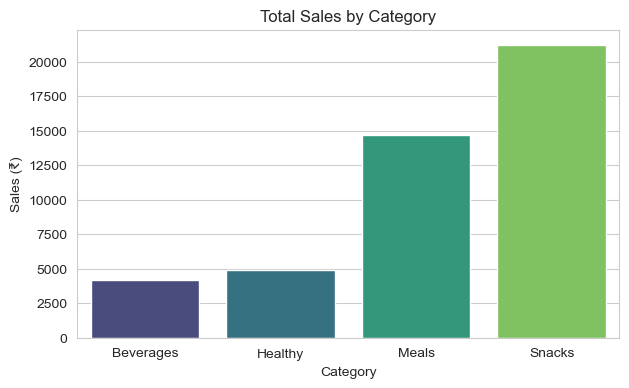

In [21]:
df['total_sales'] = df['price'] * df['quantity_sold']
category_sales = df.groupby('category')['total_sales'].sum().reset_index()
print(category_sales)

plt.figure(figsize=(7, 4))
sns.barplot(data=category_sales, x='category', y='total_sales', hue='category', palette='viridis', legend=False)
plt.title('Total Sales by Category')
plt.ylabel('Sales (₹)')
plt.xlabel('Category')
plt.show()


   time_slot  quantity_sold
1    Evening            351
2    Morning            235
0  Afternoon            220


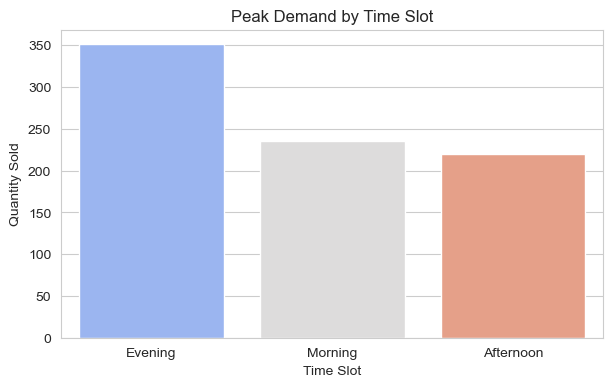

In [25]:
time_demand = df.groupby('time_slot')['quantity_sold'].sum().reset_index().sort_values(by='quantity_sold', ascending=False)
print(time_demand)

plt.figure(figsize=(7, 4))
sns.barplot(
    data=time_demand,
    x='time_slot',
    y='quantity_sold',
    hue='time_slot',      # assign x variable to hue
    palette='coolwarm',
    legend=False           # hide redundant legend
)
plt.title('Peak Demand by Time Slot')
plt.xlabel('Time Slot')
plt.ylabel('Quantity Sold')
plt.show()


Correlation between Price and Quantity Sold: 0.14


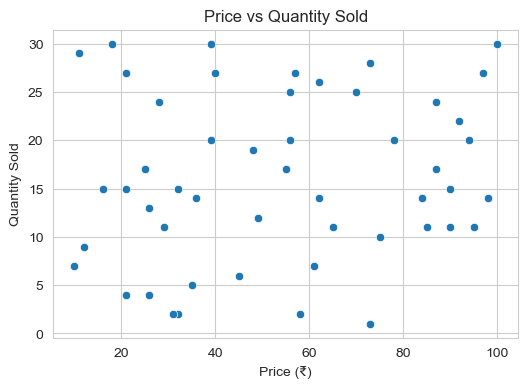

In [22]:
corr = df['price'].corr(df['quantity_sold'])
print(f"Correlation between Price and Quantity Sold: {corr:.2f}")

plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='price', y='quantity_sold')
plt.title('Price vs Quantity Sold')
plt.xlabel('Price (₹)')
plt.ylabel('Quantity Sold')
plt.show()


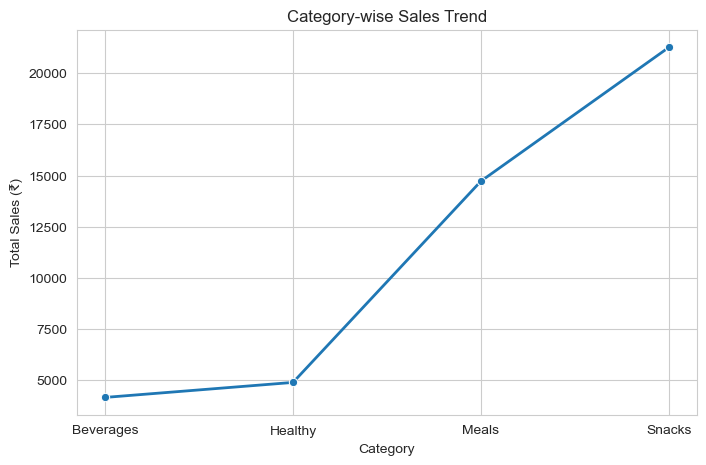

In [23]:

plt.figure(figsize=(8, 5))
sns.lineplot(data=category_sales, x='category', y='total_sales', marker='o', linewidth=2)
plt.title('Category-wise Sales Trend')
plt.xlabel('Category')
plt.ylabel('Total Sales (₹)')
plt.show()
